In [1]:
import pandas as pd
df=pd.read_csv("dataset.csv")

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['attribute'], df['category'], random_state=1)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train.values.astype('U'))
X_test_cv = cv.transform(X_test)

In [9]:
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

In [10]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))
f=(2*precision_score(y_test, predictions)* recall_score(y_test, predictions))/((1/ recall_score(y_test, predictions))+(1/ precision_score(y_test, predictions)))
print("f score: "+str(f))

Accuracy score:  0.975609756097561
Precision score:  0.9473684210526315
Recall score:  1.0
f score: 0.9217638691322902


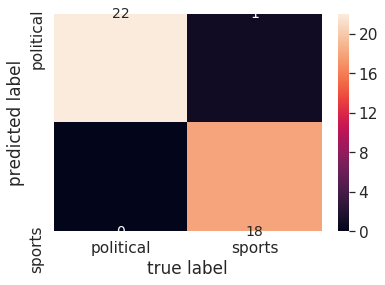

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.set(font_scale=1.4)#
sns.heatmap(cm, annot=True,annot_kws={"size": 14},
xticklabels=['political', 'sports'], yticklabels=['political', 'sports'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [40]:
cm #confusion matrix

array([[22,  1],
       [ 0, 18]])

In [17]:
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('sports')
    else:
        testing_predictions.append('political')
check_df = pd.DataFrame({'actual': list(y_test), 'prediction': testing_predictions, 'Message':list(X_test)})
check_df.replace(to_replace=0, value='political', inplace=True)
check_df.replace(to_replace=1, value='sports', inplace=True)

In [19]:
check_df

,actual,prediction,Message
0,sports,sports,CricketEden Gardens will host the first ever d...
1,sports,sports,Keeping in mind the dew factors that comes int...
2,political,political,"On 5 August 2019, the Government of India revo..."
3,sports,sports,India look set to host their first-ever day-ni...
4,political,political,Jump to navigationSpeak NowThe Narendra Modi g...
5,sports,sports,Keeping in mind the dew factors that comes int...
6,political,political,"On 5 August 2019, the Government of India revo..."
7,sports,sports,Get the best of news in your inbox everydayTha...
8,political,political,"On 5 August 2019, the Government of India revo..."
9,sports,sports,Jump to navigationSpeak NowThe Indian cricket ...
